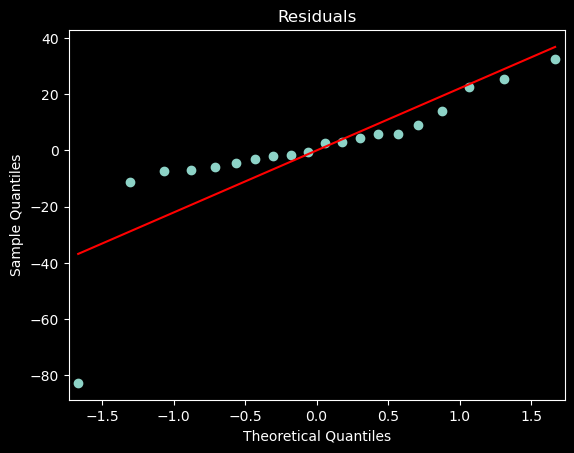

In [3]:
import numpy as np
import statsmodels.api as sm  # 导入statsmodels库, 用于统计分析
from sklearn.linear_model import LinearRegression  # 导入线性回归模型
import matplotlib.pyplot as plt # 导入matplotlib库, 用于绘图
from mpl_toolkits.mplot3d import Axes3D  # 导入3D绘图库

# 1、某建筑材料公司的销售量因素分析
# (1) 数据输入
x1 = [5.5, 2.5, 8.0, 3.0, 3.0, 2.9, 8.0, 9.0, 4.0, 6.5, 5.5, 5.0, 6.0, 5.0, 3.5, 8.0, 6.0, 4.0, 7.5, 7.0]
x2 = [31, 55, 67, 50, 38, 71, 30, 56, 42, 73, 60, 44, 50, 39, 55, 70, 40, 50, 62, 59]
x3 = [10, 8, 12, 7, 8, 12, 12, 5, 8, 5, 11, 12, 6, 10, 10, 6, 11, 11, 9, 9]
x4 = [8, 6, 9, 16, 15, 17, 8, 10, 4, 16, 7, 12, 6, 4, 4, 14, 6, 8, 13, 11]
y = [79.3, 200.1, 163.2, 200.1, 146.0, 177.7, 30.9, 291.9, 160.0, 339.4, 159.6, 86.3, 237.5, 107.2, 155.0, 201.4, 100.2, 135.8, 223.3, 195.0]
X = np.column_stack((np.ones(len(x1)), x1, x2, x3, x4))
# np.column_stack()函数用于将多个数组合并为一个数组，并按列排列。
# 将数组合并的函数: np.column_stack()


# (2) 求结果
regr = LinearRegression().fit(X[:, :-1], y)  #LinearRegression()函数用于创建线性回归模型，fit()函数用于拟合模型
# X[:, :-1]表示X的前两列，即不包括最后一列y
b = regr.coef_    # coef_: 回归系数
bint = None # b的标准误差和置信区间在Python中需要手动计算或使用其他库
r = y - regr.predict(X[:, :-1])
rint = None # r的标准误差和置信区间在Python中需要手动计算或使用其他库
stats = None # stats在Python中需要手动计算或使用其他库

# (3) 画残差图
fig = plt.figure()
ax = fig.add_subplot(111)  # 创建一个子图
sm.qqplot(r, line='s', ax=ax)
plt.title('Residuals')
plt.show()


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.982
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     111.5
Date:                Tue, 04 Feb 2025   Prob (F-statistic):           4.76e-07
Time:                        20:36:23   Log-Likelihood:                -26.918
No. Observations:                  13   AIC:                             63.84
Df Residuals:                       8   BIC:                             66.66
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         62.4054     70.071      0.891      0.3

d:\download\anaconda\anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=13
  res = hypotest_fun_out(*samples, **kwds)


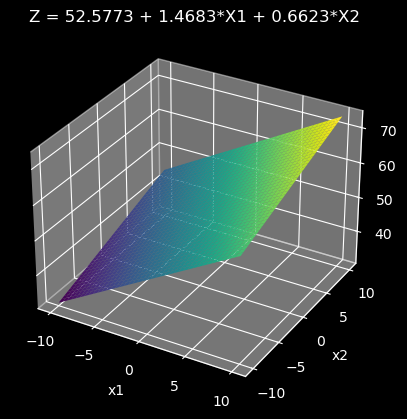

In [2]:
# 2、水泥凝固时放热分析
# (1) 数据输入
x1 = [7, 1, 11, 11, 7, 11, 3, 1, 2, 21, 1, 11, 10]
x2 = [26, 29, 56, 31, 52, 55, 71, 31, 54, 47, 40, 66, 68]
x3 = [6, 15, 8, 8, 6, 9, 17, 22, 18, 4, 23, 9, 8]
x4 = [60, 52, 20, 47, 33, 22, 6, 44, 22, 26, 34, 12, 12]
y = [78.5, 74.3, 104.3, 87.6, 95.9, 109.2, 102.7, 72.5, 93.1, 115.9, 83.8, 113.3, 109.4]
x = np.column_stack((x1, x2, x3, x4))

# (2) 逐步回归
stepwise_result = sm.OLS(y, sm.add_constant(x)).fit()  
# sm.OLS()函数用于拟合多元线性回归模型，
print(stepwise_result.summary())

# 3、作图
# 定义自变量的范围
x1 = np.arange(-10, 10.1, 0.1)  # np.arange(start, stop, step)函数用于生成指定范围内的数字
x2 = np.arange(-10, 10.1, 0.1)

# 计算对应的因变量值
X1, X2 = np.meshgrid(x1, x2)
Z = 52.5773 + 1.4683 * X1 + 0.6623 * X2

# 绘制三维图形
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # 创建三维坐标轴,111表示1行1列1个子图
surf = ax.plot_surface(X1, X2, Z, cmap='viridis')  # cmap='viridis'表示使用彩色图
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('z')
ax.set_title('Z = 52.5773 + 1.4683*X1 + 0.6623*X2')
plt.show()
